In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('data_processed/subset10k_oneHot.csv')
df2 = pd.read_csv('data_processed/subsetWyniki10_oneHot.csv')

In [3]:
df1['7.5_combined'] = df1['7.5'] | df1['7.5.'] | df1['7.5.)']

In [4]:
merged_df = pd.merge(df1, df2, on='tenderId', how='inner')
merged_df.head()

,Unnamed: 0.1_x,Unnamed: 0_x,orderType,isTenderAmountBelowEU_x,orderObject_x,tenderId,contractors_x,objectId,71521000-6_x,98390000-3_x,...,6.3.),8.4.),4.3.),4.5.1.),4.3.1),5.2.1.),6.4.),6.2.),4.5.5.),7.4.1.)
0,0,0,Delivery,True,Dostawa gazów medycznych wraz z dzierżawą butl...,ocds-148610-65bc0cb3-86a2-11ed-94da-6ae0fe5e7159,NaN,08daec88-a2be-9d2b-100a-0600107fa4a5,0,0,...,875127.64,0.0,0.00,0.0,0.00,0.0,875127.64,875127.64,0.00,0.0
1,1,1,Delivery,True,1-P-23 Akcesoria do urządzeń medycznych,ocds-148610-cd97182f-8a63-11ed-b4ea-f64d350121d2,NaN,08daec89-e42d-79e6-e8e1-8400116e04c3,0,0,...,192952.95,0.0,0.00,0.0,0.00,0.0,192952.95,192952.95,17080.76,0.0
2,2,2,Delivery,True,Sukcesywna dostawa drobnego sprzętu laboratory...,ocds-148610-f8a2c4f0-8a65-11ed-b4ea-f64d350121d2,NaN,08daec8b-e418-1fcc-100a-0600107fa4af,0,0,...,42074.08,0.0,229044.28,0.0,103448.38,0.0,42074.08,42074.08,37393.50,0.0
3,3,3,Delivery,True,2-P-23 Leki i inne produkty lecznicze,ocds-148610-3ee37822-8a68-11ed-94da-6ae0fe5e7159,NaN,08daec8e-7fa7-7790-e8e1-8400116e04d8,0,0,...,134366.04,0.0,0.00,0.0,0.00,0.0,105127.20,105127.20,27313.40,0.0
4,4,4,Delivery,True,Sukcesywna dostawa podstawowych odczynników ch...,ocds-148610-c61d386a-8a6f-11ed-94da-6ae0fe5e7159,NaN,08daec95-45a7-1ee8-100a-0600107fa52d,0,0,...,18798.19,0.0,229044.28,0.0,125595.90,0.0,13367.64,13367.64,12530.89,0.0


7.5 - Considered Ecological Impact
4.3.10 - Use of Expanse Account with Ecological Aspects
6.2 - Offer Cost
8.2 - Final Deal Cost

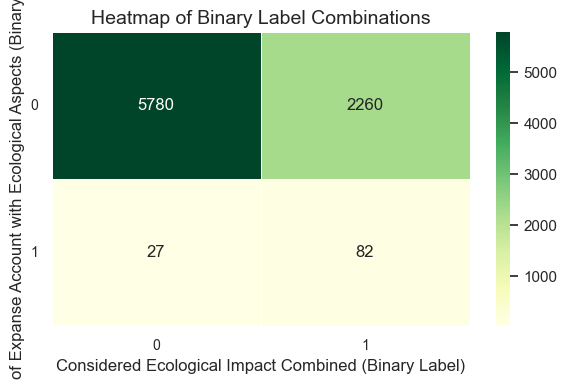

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crosstab to count all combinations
crosstab = pd.crosstab(merged_df["4.3.10.)"], merged_df["7.5_combined"])

# Change the theme
sns.set_theme(style="whitegrid")  # Other styles: darkgrid, white, dark, ticks

# Define a custom green palette
green_palette = "YlGn"  # Yellow-Green palette in Seaborn

# Plot the heatmap with the green palette
plt.figure(figsize=(6, 4))
sns.heatmap(crosstab, annot=True, fmt="d", cmap=green_palette, cbar=True, linewidths=0.5)

# Add labels and a title
plt.title("Heatmap of Binary Label Combinations", fontsize=14)
plt.xlabel("Considered Ecological Impact Combined (Binary Label)", fontsize=12)
plt.ylabel("Use of Expanse Account with Ecological Aspects (Binary Label)", fontsize=12)
plt.xticks([0.5, 1.5], ['0', '1'], rotation=0, fontsize=10)
plt.yticks([0.5, 1.5], ['0', '1'], rotation=0, fontsize=10)

# Display the heatmap
plt.tight_layout()
plt.show()



In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_correlation(merged_df, price_label, cut=1e7, price_label_name = "Use of Expanse Account with Ecological Aspects"):
    # Filter the data to exclude rows where the price_label is 0 and above 1e7
    data = merged_df[merged_df[price_label] != 0]
    data = data[data[price_label] < cut]
    
    # Calculate the correlation
    correlation8_2 = data["7.5.)"].corr(data[price_label])

    # Set the custom shades of green for the two categories (0 and 1 in "7.5_combined")
    green_shades = ["#2e7d32", "#90ee90"]  # Different shades for 0 and 1 values in 7.5_combined
    sns.set_palette(green_shades)
    
    # Plot the violin plot for the given price_label grouped by "7.5_combined"
    plt.figure(figsize=(8, 6))
    sns.violinplot(x="7.5.)", y=price_label, data=data, scale="width", palette=green_shades)

    # Add labels and title
    plt.title(f"Distribution of {price_label_name} Grouped by Considered Ecological Impact", fontsize=14)
    plt.xlabel("Considered Ecological Impact (Binary)", fontsize=12)
    plt.ylabel(price_label, fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()

    return correlation8_2


C:\Users\mateu\AppData\Local\Temp\ipykernel_23808\1684878831.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="7.5.)", y=price_label, data=data, scale="width", palette=green_shades)
C:\Users\mateu\AppData\Local\Temp\ipykernel_23808\1684878831.py:18: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x="7.5.)", y=price_label, data=data, scale="width", palette=green_shades)


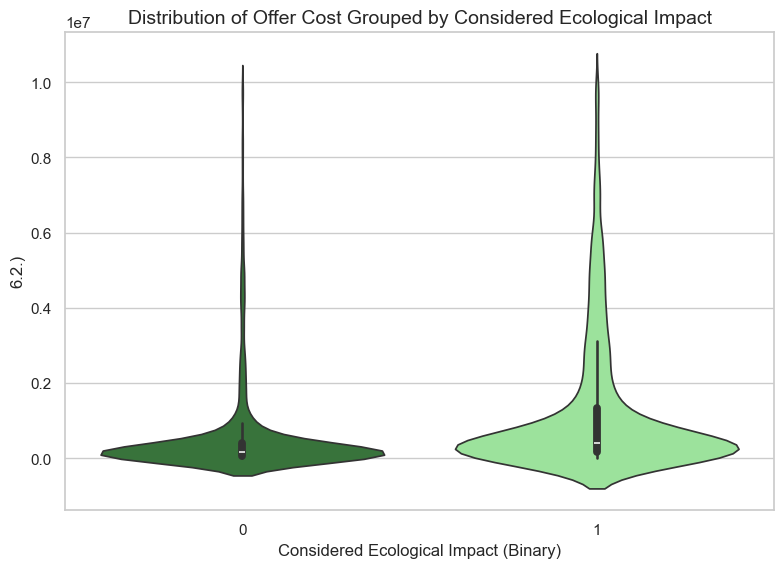

In [16]:
correlation6_2 = get_correlation(merged_df, "6.2.)", price_label_name="Offer Cost")

C:\Users\mateu\AppData\Local\Temp\ipykernel_23808\1684878831.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="7.5.)", y=price_label, data=data, scale="width", palette=green_shades)
C:\Users\mateu\AppData\Local\Temp\ipykernel_23808\1684878831.py:18: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x="7.5.)", y=price_label, data=data, scale="width", palette=green_shades)


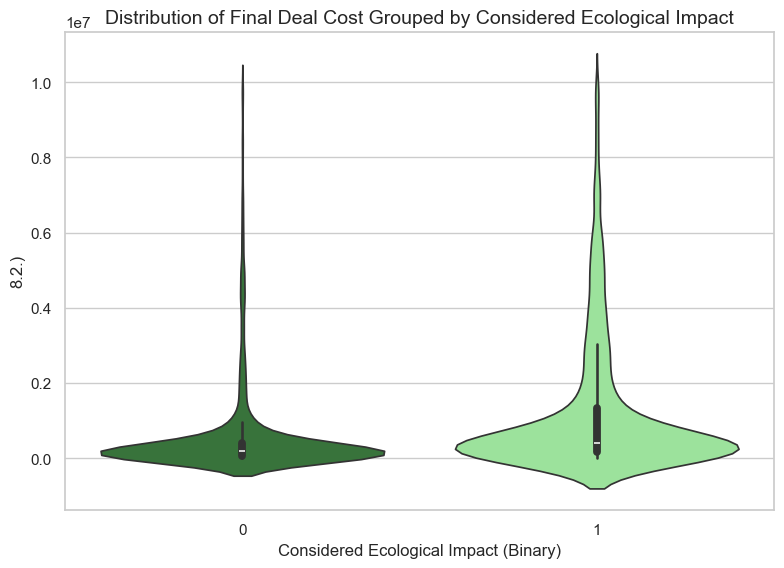

In [17]:
correlation8_2 = get_correlation(merged_df, "8.2.)", price_label_name="Final Deal Cost")

C:\Users\mateu\AppData\Local\Temp\ipykernel_23808\1684878831.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="7.5.)", y=price_label, data=data, scale="width", palette=green_shades)
C:\Users\mateu\AppData\Local\Temp\ipykernel_23808\1684878831.py:18: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x="7.5.)", y=price_label, data=data, scale="width", palette=green_shades)


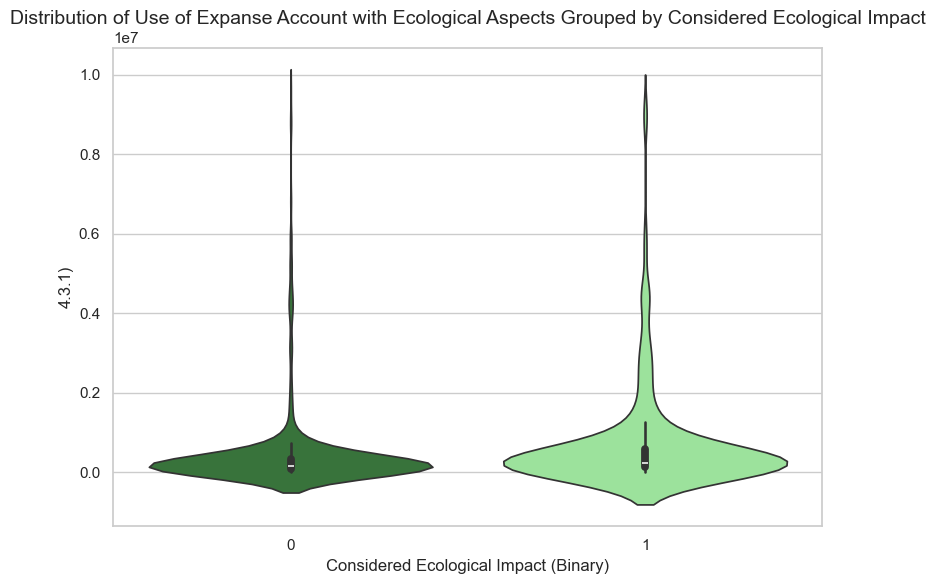

In [18]:
correlation4_3_1 = get_correlation(merged_df, "4.3.1)", price_label_name="Use of Expanse Account with Ecological Aspects")

Text(0.5, 1.0, 'correlation of different price measures with consideration of environmental issues Considered Ecological Impact')

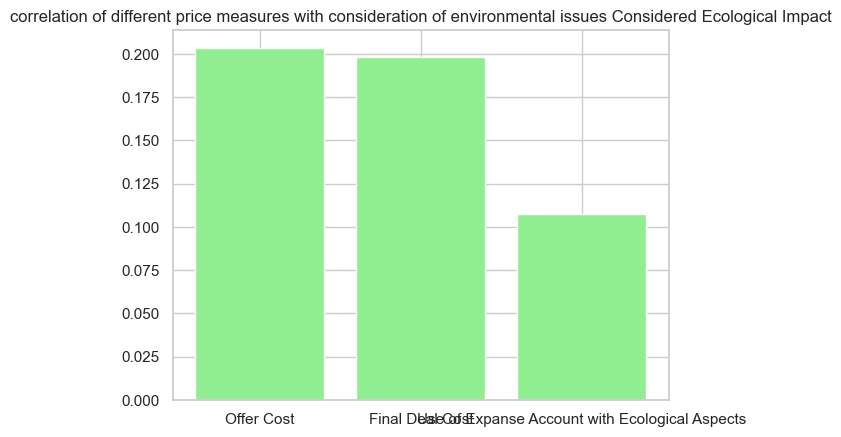

In [19]:
custom_green_palette = ["#90ee90"]
plt.bar(["Offer Cost", "Final Deal Cost", "Use of Expanse Account with Ecological Aspects"], [correlation6_2, correlation8_2, correlation4_3_1], color=custom_green_palette)
plt.title("correlation of different price measures with consideration of environmental issues Considered Ecological Impact")

In [20]:
import re
def filtered_correlations(merged_df, price_label):
    pattern = "\d+-\d+"
    correlations = []

    for column in merged_df.columns:
        if re.match(pattern, column):
            filtered = merged_df[merged_df[column] == 1]
            if filtered.shape[0] > 100:
                correlation = filtered["7.5_combined"].corr(filtered[price_label])
                correlations.append((column, correlation))
    return correlations



In [21]:
filtered_correlation6_2 = filtered_correlations(merged_df, "6.2.)")

d:\git-pull-all-nighter\Planet_on_env\lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\git-pull-all-nighter\Planet_on_env\lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [22]:
filtered_correlation6_2.sort(key=lambda x:x[1])
filtered_correlation6_2

[('45111291-4_x', np.float64(-0.1694831044671658)),
 ('45330000-9_x', np.float64(-0.1677379026739049)),
 ('45112710-5_x', np.float64(-0.13802945605515515)),
 ('45233200-1_x', np.float64(-0.13740379907112557)),
 ('45320000-6_x', np.float64(-0.12724990890050858)),
 ('45233220-7_x', np.float64(-0.11908685256964495)),
 ('45233290-8_x', np.float64(-0.11362553238427696)),
 ('45331100-7_x', np.float64(-0.10909221255791227)),
 ('45111000-8_x', np.float64(-0.10870678589163377)),
 ('66510000-8_x', np.float64(-0.08786424653402533)),
 ('45233142-6_x', np.float64(-0.08544760938785927)),
 ('45310000-3_x', np.float64(-0.08117405239087859)),
 ('45111200-0_x', np.float64(-0.06834372859651215)),
 ('45200000-9_x', np.float64(-0.05975341610428388)),
 ('45421000-4_x', np.float64(-0.056338103303177234)),
 ('45453000-7_x', np.float64(-0.05546678520196256)),
 ('45111300-1_x', np.float64(-0.05523881825797851)),
 ('45311200-2_x', np.float64(-0.03779369244194701)),
 ('15800000-6_x', np.float64(-0.037514064423046

* Roboty w zakresie zagospodarowania terenu -0.1694831044671658
* Roboty instalacyjne wodno-kanalizacyjne i sanitarne -0.1677379026739049
* Roboty w zakresie krztałtowania terenów zielonych -0.13802945605515515

* Usługi inżynierskie w zakresie projektowania 0.11246455413538087
* Roboty budowlane w zakresie układania chodników i asfaltowania 0.12126093976874484
* Usługi architektoniczne budowlane inżynieryjne i knontrolne 0.2055304153134915


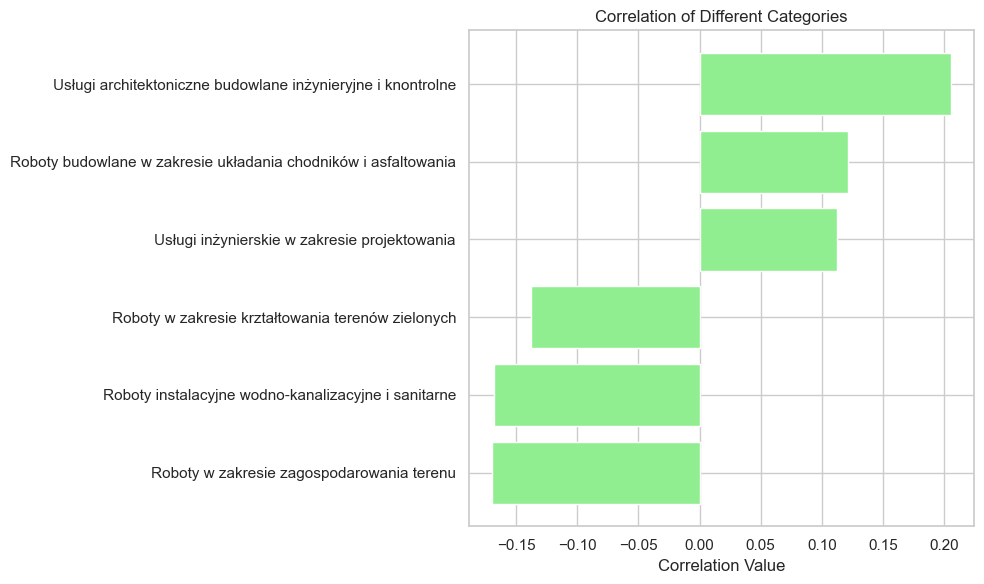

In [23]:
import matplotlib.pyplot as plt

# Data for the plot
labels = [
    "Roboty w zakresie zagospodarowania terenu",
    "Roboty instalacyjne wodno-kanalizacyjne i sanitarne",
    "Roboty w zakresie krztałtowania terenów zielonych",
    "Usługi inżynierskie w zakresie projektowania",
    "Roboty budowlane w zakresie układania chodników i asfaltowania",
    "Usługi architektoniczne budowlane inżynieryjne i knontrolne"
]

values = [
    -0.1694831044671658,
    -0.1677379026739049,
    -0.13802945605515515,
    0.11246455413538087,
    0.12126093976874484,
    0.2055304153134915
]

# Set the custom green color palette
custom_green_palette = ["#90ee90"]

# Plot the horizontal barplot with the custom green colors
plt.figure(figsize=(10, 6))
plt.barh(labels, values, color=custom_green_palette)

# Add labels and title
plt.xlabel('Correlation Value')
plt.title('Correlation of Different Categories')

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\mateu\AppData\Local\Temp\ipykernel_23808\1684878831.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="7.5.)", y=price_label, data=data, scale="width", palette=green_shades)
C:\Users\mateu\AppData\Local\Temp\ipykernel_23808\1684878831.py:18: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x="7.5.)", y=price_label, data=data, scale="width", palette=green_shades)


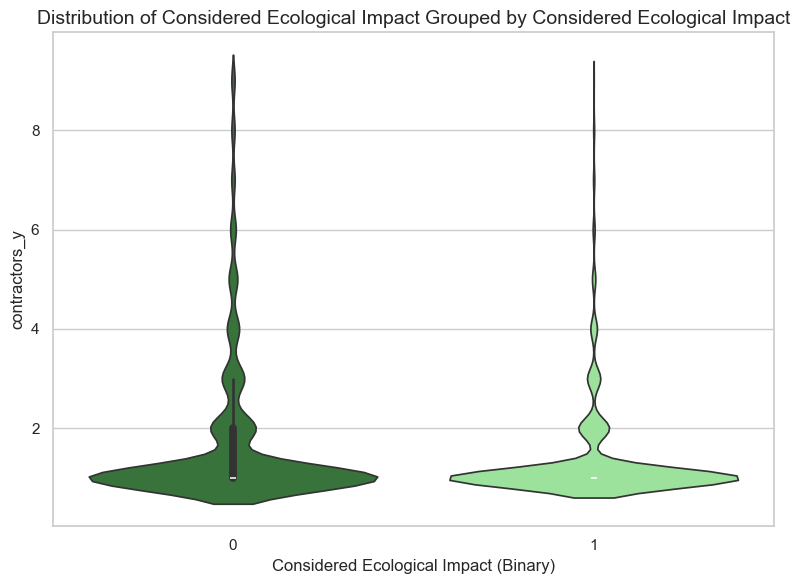

-0.11224941727087467


In [24]:
correlation_contractors = get_correlation(merged_df, "contractors_y", cut=10, price_label_name="Considered Ecological Impact")
print(correlation_contractors)